# 第3章 Keras 和 TensorFlow 入门

## 3.1 TensorFlow 简介

TensorFlow 是一个开源的机器学习平台，由谷歌开发。其主要目的是让工程师和研究人员能够在数值张量上操作数学表达式。其能力主要表现在：

- 可以自动计算任意可微表达式的梯度

- 不仅可以在 CPU 上运行，而且可以在GPU、TPU等高度并行的杨戬加速器上运行

- 很容易在多台机器上分布式进行

- TensorFlow 程序可以导出到其他运行时环境


## 3.2 简介

Keras 是一个用 Python 编写的深度学习 API，构建于 TensorFlow 之上。

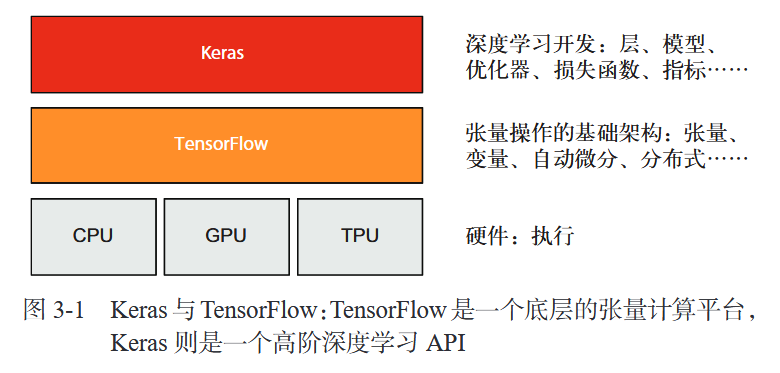

## 3.3 Keras 和 TensorFlow 简史

Keras 最初是构建在 Theano 之上的，Theano 是由蒙特利尔大学的蒙特利尔学习算法研究所（MILA）开发，在许多方面是 TensorFlow 的先驱。

2015 年底 TensorFlow 发布后，Keras 被重构为多后端，可以在 Theano 或 TensorFlow 之间切换。

2017 年，Keras 又增加了两个新的后端选项：CNTK(由微软开发)和 MXNet(由亚马逊开发)。

如今，除了 TensorFlow 以外，其他后端均已停止开发。

## 3.4 建立深度学习工作区

购买 GPU 或租用云服务器

### 3.4.1 Jupyter 笔记本：运行深度学习实验的首选方案

### 3.4.2 使用 Colaboratory

Colaboratory（简称 Colab）是一项免费的 Jupyter 笔记本服务。

## 3.5 TensorFlow 入门

### 3.5.1 常数张量和变量

代码清单 3-1 全 1 张量和全 0 张量

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)
x = tf.zeros(shape=(2,1))
print(x)

2025-02-12 10:58:25.487502: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2025-02-12 10:58:27.457726: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-02-12 10:58:27.462616: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-02-12 10:58:27.522849: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-12 10:58:27.522914: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2025-02-12 10:58:27.522935: I tensorflow/stream_exec

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


代码清单 3-2 随即张量

In [2]:
# 从均值为0、标准差为1的正态分布中抽取随机张量
# 等同于 np.random.normal(size=(3, 1), loc=0, scale=1)
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
# 从 0 和 1 之间的均匀分布中抽取随即张量
# 等同于 np.random.uniform(size=(3, 1), low=0, high=1)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[ 0.72328335]
 [-0.26583162]
 [-0.73981917]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.9925033 ]
 [0.06622648]
 [0.7899363 ]], shape=(3, 1), dtype=float32)


NumPy 数组和 TensorFlow 张量之间的一个重要区别是，TensorFlow 张量是不可赋值的，它是常量，举例：

代码清单 3-3 NumPy 数组是可赋值的

In [4]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0

代码清单 3-4 TensorFlow 张量是不可赋值的

In [5]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

代码清单 3-5 创建一个 TensorFlow 变量

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.1365206 ],
       [-0.09094619],
       [-1.2513721 ]], dtype=float32)>


> 变量可以通过 `assign` 方法进行修改，如代码清单 3-6

代码清单 3-6 为 TensorFlow 变量赋值

In [10]:
# 赋值必须于原始值的 `shape` 相同
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

代码清单 3-7 为 TensorFlow 变量的子集赋值

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

代码清单 3-8 使用 assign_add()

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

> `assign_add()` 和 `assign_sub()` 分别等同于 `+=` 和 `-=` 的效果

### 张量运算：用 TensorFlow 进行数学运算

代码清单 3-9 一些基本的数学运算

In [14]:
a = tf.ones((2, 2))
b = tf.square(a) # 求平方
c = tf.sqrt(a) # 求平方根
d = b + c
e = tf.matmul(a, b) # 计算两个张量的积
e *= d # 两个张量相乘

2025-02-12 11:25:09.840221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


### 3.5.3 重温 GradientTape API

代码清单 3-10 使用 GradientTape

In [15]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

> `tape.gradient()` 函数的功能是计算张量的梯度。本例中，`result` 是 $y=9$ 的张量，`input_var` 是值为 $x=3$ 的张量。相当于是 $y=x^2$，$y$ 的梯度极为 $grad(y, x^2)=2x$，所以 `gradient` 的值为 6。

代码清单 3-11 对常数张量输入使用 GradientTape

In [25]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

代码清单 3-12 利用嵌套的梯度带计算二阶梯度

In [26]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)


tf.Tensor(9.8, shape=(), dtype=float32)


> `position` 对 `time` 求梯度得到 `speed`，`speed` 对 `time` 再求梯度得到 `accekeration` ，即加速度。

### 3.5.4 一个端到端的例子：用 TensorFlow 编写线性分类器

代码清单 3-13 在二维平面上随机生成两个类别点

In [27]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [28]:
print(negative_samples)

[[-0.61635818  0.84652944]
 [ 1.13458221  4.28649927]
 [ 0.06686616  1.71954372]
 ...
 [ 1.09597543  2.93769124]
 [ 1.10099262  2.68296823]
 [ 0.87557125  3.2071832 ]]


代码清单 3-14 将两个类别堆叠形成一个形状为（2000，2）的数组

In [29]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

代码清单 3-15 生成对应的目标标签

In [30]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))


代码清单 3-16 绘制两个点类的图像

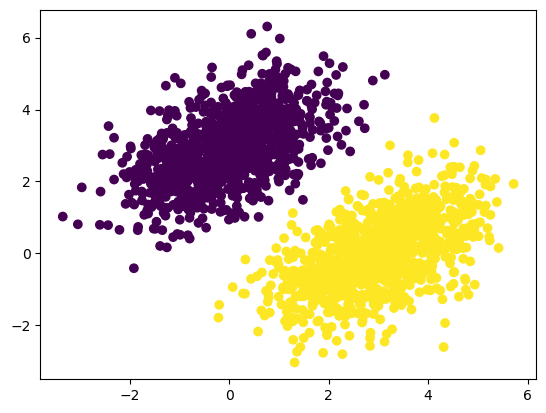

In [31]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

代码清单 3-17 创建线性分类器的变量


In [32]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

代码清单 3-18 前向传播函数

In [33]:
def model(inputs):
    return tf.matmul(inputs, W) + b

代码清单 3-19 均方误差损失函数

In [34]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

代码清单 3-20 训练步骤函数

In [35]:
learning_rate = 0.1

def training_step(inputs, target):
    # 使用tf.GradientTape()来记录前向传播过程，从而计算梯度
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(target, predictions)
    # 计算相对于模型变量的损失梯度
    grad_W, grad_b = tape.gradient(loss, [W, b])
    # 更新权重
    W.assign_sub(grad_W * learning_rate)
    b.assign_sub(grad_b * learning_rate)
    return loss
    
    

代码清单 3-21 批量训练循环

In [36]:
for step in range(40):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 3.0954
Loss at step 1: 0.4953
Loss at step 2: 0.1778
Loss at step 3: 0.1310
Loss at step 4: 0.1175
Loss at step 5: 0.1087
Loss at step 6: 0.1011
Loss at step 7: 0.0942
Loss at step 8: 0.0880
Loss at step 9: 0.0823
Loss at step 10: 0.0771
Loss at step 11: 0.0724
Loss at step 12: 0.0681
Loss at step 13: 0.0642
Loss at step 14: 0.0607
Loss at step 15: 0.0574
Loss at step 16: 0.0545
Loss at step 17: 0.0518
Loss at step 18: 0.0494
Loss at step 19: 0.0471
Loss at step 20: 0.0451
Loss at step 21: 0.0433
Loss at step 22: 0.0416
Loss at step 23: 0.0401
Loss at step 24: 0.0387
Loss at step 25: 0.0374
Loss at step 26: 0.0363
Loss at step 27: 0.0352
Loss at step 28: 0.0343
Loss at step 29: 0.0334
Loss at step 30: 0.0326
Loss at step 31: 0.0319
Loss at step 32: 0.0312
Loss at step 33: 0.0306
Loss at step 34: 0.0301
Loss at step 35: 0.0296
Loss at step 36: 0.0292
Loss at step 37: 0.0287
Loss at step 38: 0.0284
Loss at step 39: 0.0280


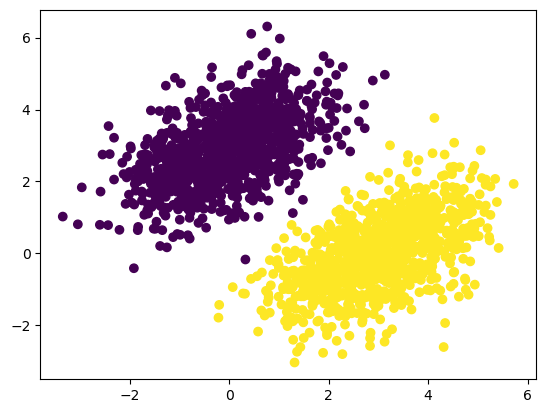

In [37]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 3.6 神经网络剖析：了解核心 Keras API

### 3.6.1 层：深度学习的基础模块

神经网络的基本数据结构是**层**，它接收张量并输出张量。有些层是无状态的，但大多数层具有状态，即层的**权重**。

不同类型的层适用于不同的张量格式和不同类型的处理，如：

- 简单的向量数据存储在形状为（samples，features）的 2 阶张量中，通常使用**密集连接层** [ densely connected layer，也叫**全连接层**（fully connected layer）或**密集层**（dese layer），对应于 Keras 的 Dense 类]

- 序列数据存储在形状为（samples，time steps，features）的 3 阶张量里面，通常用**循环层**（recurrent layer）来处理，比如 LSTM 层或一维卷积层（Con1D）

- 图像数据存储在 4 阶张量中，通常用二维卷积层（Conv2D）来处理

#### 1. Keras 的 Layer 基类

Keras 中的核心概念是 Layer 类。Layer 是封装了状态（权重）和计算（前向传播）的对象。权重通常在 `build()` 中定义，计算则在 `call()` 方法中定义。

在第 2 章中定义的 `NaiveDense` 类，`output = activation(dot(input, W) + b)`，于 Layer 的概念非常类似。`W`，`b` 是记录了状态，`activation()` 是计算。

代码清单 3-22 Dense 层的实现：作为 Layer 的子类

In [38]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # Keras 的所有层都继承自 Layer 基类
    def __init__(self, units, activation=None):
        super(SimpleDense, self).__init__() # super() 函数调用父类的方法
        self.units = units
        self.activation = activation
        
    def budild(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y
    

#### 2. 自动推断形状：动态构建层

就像玩乐高积木一样,你只能将兼容的层“拼接”在一起。层兼容性(layer compatibility)  的概念具体指的是,每一层只接收特定形状的输入张量,并返回特定形状的输出张量。

在使用 Keras 时,往往不必担心尺寸兼容性问题,因为添加到模型中的层是动态构建的,  以匹配输入层的形状。

### 3.6.2 从层到模型

`Sequential` 是 Keras 中 model 的一个子类，它是层的简单堆叠。一些常用的 model 结构还包括：

- 双分支（two-branch）网络

- 多头（multihead）网络

- 残差连接

在 Keras 中构建模型通常由梁总方法：直接作为 Model 类的子类，或者使用函数式 API。

模型的拓扑结构定义了一个**假设空间**。机器学习就是在预  先定义的**可能性空间内**,利用反馈信号的指引,寻找特定输入数据的有用表示。选择正确的网络架构,更像是一门艺术而不是科学。虽然有一些最佳实践和原则,但只有  实践才能帮助你成为合格的神经网络架构师。

### 3.6.3 编译步骤：配置学习过程

一旦确定了模型架构，你还需要选定以下 3 个参数。

- **损失函数（目标函数）**

- **优化器**

- **指标**：衡量成功的标准

`compile()` 方法是的作用是配置训练过程，它接收的参数是 `optimizer`、`loss`、`metrics`。

```
model = keras.Sequential([keras.layers.Dense(1)]) 
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])
```

### 3.6.4 选择损失函数

如果损失函数选择的不合适，可能会得到意想不到的副作用。

一些简单的指导原则，如：

- 对于二分类问题，可以使用二元交叉熵损失函数

- 对于多分类问题，可以使用分类交叉熵损失函数。

### 3.6.5 理解 `fit()` 方法

`fit()` 方法执行训练循环，它有以下关键参数。

- 要训练的**数据**

- 训练**轮数**

- 在每轮小批量梯度下降中使用的**批量大小**


代码清单 3-23 对 NumPy 数据调用 `fit()`

```python
history = model.fit(
    inputs, # 输入
    targets, # 标签
    epochs=5,
    batch_size=128
)
```

`fit()` 函数将放回一个 `History` 字典对象。

### 3.6.6 监控验证数据上的损失和指标

代码清单 3-24 使用 `validation_data` 参数

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(training_inputs, training_targets, epochs=5, batch_size=16,
          validation_data=(val_inputs, val_targets))

NameError: name 'targets' is not defined

> `validation_data` 参数的作用：在每个训练周期（epoch）结束时评估模型的性能，通过提前停止的机制来避免过拟合，，还可以调整模型的超参数（如：学习率、批大小、正则化参数等）

### 3.6.7 推断：在训练后使用模型

预测新数据的过程叫做**推断**（inference）

```python
# 调用 __call__()，所有的数据会一次性存入 GPU
predictions = model(new_input)
# 调用 predict() 的好处是迭代运算，更节省运算资源
prediction = model.prediction(new_inputs, batch_size=128)
```
